In [1]:
import geopandas as gpd
import pandas as pd
import nivapy3 as nivapy
from shapely.geometry import box

In [2]:
# Connect to PostGIS
eng = nivapy.da.connect_postgis()

Connection successful.


In [3]:
# Get main catchment
vassom_gdf = nivapy.da.read_postgis(
        'physical',
        'norway_nve_vassdragomrade_poly',
        eng,
)
vassom_gdf = vassom_gdf.query("vassdragsomradenr == '196'")

In [4]:
vassom_gdf.head()

,objekttype,vassdragsomradenr,vassdragsomrade,arealland_km2,areal_km2,geom,id
188,Vassdragsområde,196,Målselvvassdraget/Malangen,6687,6876,"MULTIPOLYGON (((18.44592 69.51074, 18.45366 69...",196


In [5]:
vassom_gdf.rename({'vassdragsomradenr': 'nummer',
                   'vassdragsomrade': 'navn',
                   'arealland_km2': 'a_land_km2',
                   'areal_km2': 'areal_km2',
                   },
                  axis='columns',
                  inplace=True)
vassom_gdf.reset_index(inplace=True)
vassom_gdf.head()

,index,objekttype,nummer,navn,a_land_km2,areal_km2,geom,id
0,188,Vassdragsområde,196,Målselvvassdraget/Malangen,6687,6876,"MULTIPOLYGON (((18.44592 69.51074, 18.45366 69...",196


<AxesSubplot:>

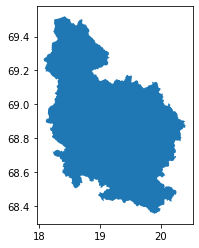

In [6]:
vassom_gdf.plot()

In [7]:
vassom_gdf.to_file("Målselva_Malangen_vassdragsområde_196.shp")

/opt/conda/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
